In [13]:
from google.colab import files
uploaded = files.upload()

Saving earthquakes in indonesia.csv to earthquakes in indonesia (1).csv


,date,year,regions
0,2008-11-01,2008,Sumba Region - Indonesia
1,2008-11-01,2008,Banda Sea
2,2008-11-01,2008,Java - Indonesia
3,2008-11-01,2008,Seram - Indonesia
4,2008-11-01,2008,Banda Sea


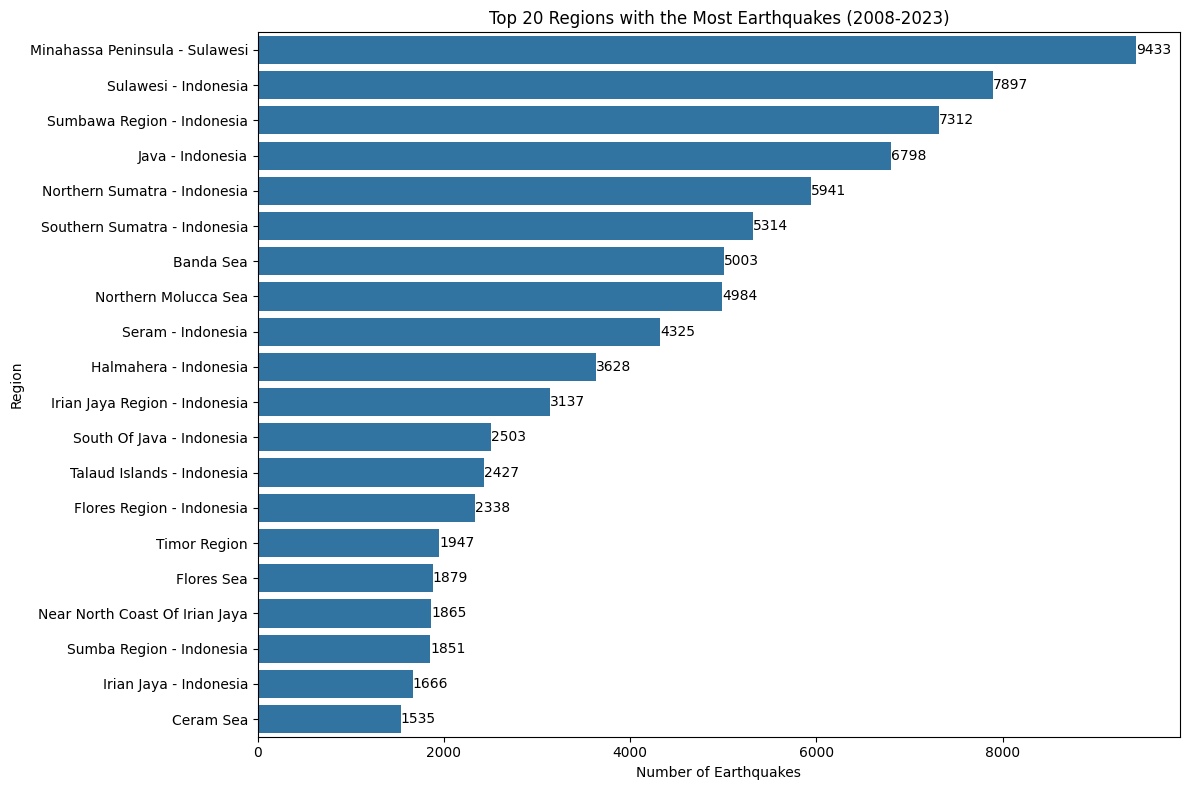

Region with Highest Earthquake Count Each Year (2008-2023):


,year,regions,count
2,2008,Banda Sea,41
75,2009,Southern Sumatra - Indonesia,429
103,2010,Minahassa Peninsula - Sulawesi,431
143,2011,Java - Indonesia,406
188,2012,Minahassa Peninsula - Sulawesi,238
231,2013,Minahassa Peninsula - Sulawesi,341
273,2014,Java - Indonesia,279
317,2015,Minahassa Peninsula - Sulawesi,719
360,2016,Minahassa Peninsula - Sulawesi,792
404,2017,Minahassa Peninsula - Sulawesi,1082



Yearly Earthquake Counts in Minahasa Peninsula - Sulawesi (2008-2023):


,year,count


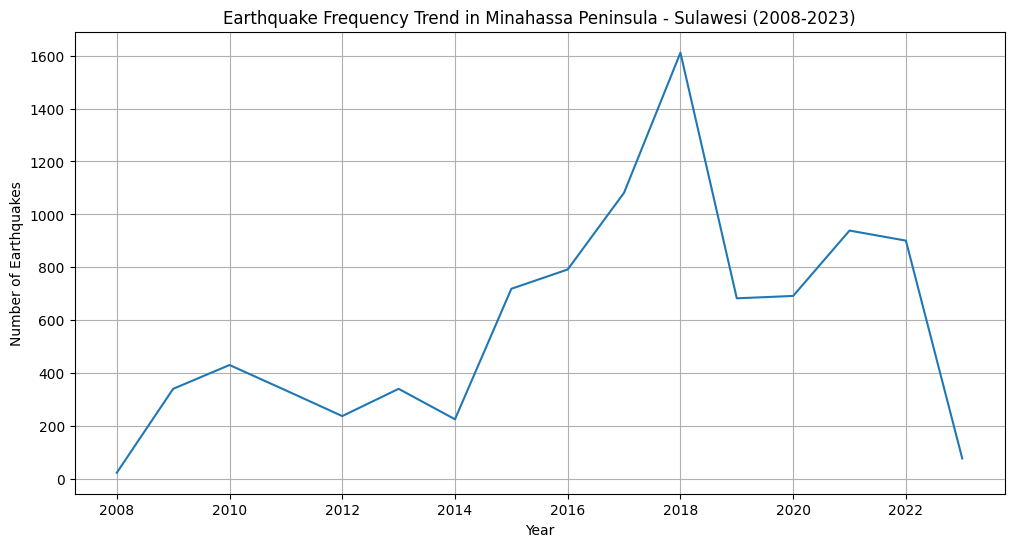

alt.Chart(...)


Regions with High Frequency but Low Magnitude Earthquakes:


,regions,total_count,low_magnitude_count,low_magnitude_proportion
18,Minahassa Peninsula - Sulawesi,9433,9182.0,0.973391
41,Sulawesi - Indonesia,7897,7773.0,0.984298
44,Sumbawa Region - Indonesia,7312,7171.0,0.980717
15,Java - Indonesia,6798,6567.0,0.966019
28,Northern Sumatra - Indonesia,5941,5705.0,0.960276
39,Southern Sumatra - Indonesia,5314,4915.0,0.924915
4,Banda Sea,5003,4382.0,0.875874
27,Northern Molucca Sea,4984,4639.0,0.930778
32,Seram - Indonesia,4325,4209.0,0.973179
12,Halmahera - Indonesia,3628,3393.0,0.935226



Regions with Low Frequency but High Magnitude Earthquakes:


,regions,total_count,low_magnitude_count,low_magnitude_proportion,high_magnitude_count,high_magnitude_proportion
23,Near South Coast Of Irian Jaya,3,1.0,0.333333,1.0,0.333333
0,Arafura Sea,7,2.0,0.285714,1.0,0.142857
17,Malay Peninsula,9,6.0,0.666667,1.0,0.111111
33,South China Sea,28,6.0,0.214286,3.0,0.107143



Year with the most earthquakes in the entire region:


,10
year,2018
total_count,12345


from matplotlib import pyplot as plt
yearly_leading_region['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
yearly_leading_region['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
yearly_leading_region.groupby('regions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
yearly_leading_region.plot(kind='scatter', x='year', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_leading_region.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('regions')):
  _plot_series(series, series_name, i)
  fig.legend(title='regions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_leading_region.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('regions')):
  _plot_series(series, series_name, i)
  fig.legend(title='regions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
yearly_leading_region['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
yearly_leading_region['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(yearly_leading_region['regions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(yearly_leading_region, x='year', y='regions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(yearly_leading_region['regions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(yearly_leading_region, x='count', y='regions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

#cleaning data
df = pd.read_csv('earthquakes in indonesia.csv')
#mengubah date of event ke datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
#mengambil tahun dari kolom tanggal
df['year'] = df['date'].dt.year
#membersihkan nama wilayah
df['regions'] = df['regions'].str.strip().str.title()
display(df[['date','year','regions']].head())

#menghitung jumlah kejadian gempa untuk setiap wilayah
earthquake_counts = df.groupby(['year', 'regions']).size().reset_index(name='count')# Menghitung total kejadian gempa per wilayah
total_earthquake_counts = earthquake_counts.groupby('regions')['count'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='count', y='regions', data=total_earthquake_counts.sort_values('count', ascending=False).head(20))
plt.title('Top 20 Regions with the Most Earthquakes (2008-2023)')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Region')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

# Mengidentifikasi wilayah dengan jumlah kejadian tertinggi untuk setiap tahun
yearly_leading_region = earthquake_counts.loc[earthquake_counts.groupby('year')['count'].idxmax()]

# Membuat table for wilayah dengan kejadian tertinggi setiap tahun
print("Region with Highest Earthquake Count Each Year (2008-2023):")
display(yearly_leading_region)

# Calculate and display yearly earthquake counts for Minahasa Peninsula - Sulawesi
minahasa_peninsula_data = df[df['regions'] == 'Minahasa Peninsula - Sulawesi']
minahasa_peninsula_yearly_counts = minahasa_peninsula_data.groupby('year').size().reset_index(name='count')
print("\nYearly Earthquake Counts in Minahasa Peninsula - Sulawesi (2008-2023):")
display(minahasa_peninsula_yearly_counts)


# Mengidentifikasi frekuensi gempa di wilayah teratas apakah meningkat/menurun/fluktuatif
# Get the region with the highest total earthquake count
top_region = total_earthquake_counts.sort_values('count', ascending=False).iloc[0]['regions']

# Filter data for the top region
top_region_data = df[df['regions'] == top_region]

# Calculate yearly counts for the top region
top_region_yearly_counts = top_region_data.groupby('year').size().reset_index(name='count')

# Plot the trend for the top region
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=top_region_yearly_counts)
plt.title(f'Earthquake Frequency Trend in {top_region} (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

#Mengelompokkan magnitude ke dalam kategori Minor (<4.0), Light (4.0–4.9), Moderate (5.0–5.9), Strong (6.0–6.9), Major (7.0–7.9),Great (≥8.0)
# Define magnitude categories
def categorize_magnitude(magnitude):
    if magnitude < 4.0:
        return 'Minor (<4.0)'
    elif 4.0 <= magnitude < 5.0:
        return 'Light (4.0–4.9)'
    elif 5.0 <= magnitude < 6.0:
        return 'Moderate (5.0–5.9)'
    elif 6.0 <= magnitude < 7.0:
        return 'Strong (6.0–6.9)'
    elif 7.0 <= magnitude < 8.0:
        return 'Major (7.0–7.9)'
    else:
        return 'Great (≥8.0)'

# Apply the categorization to the magnitude column
df['magnitude_category'] = df['magnitude'].apply(categorize_magnitude)

# Group regions by magnitude category and count occurrences
region_magnitude_counts = df.groupby(['regions', 'magnitude_category']).size().reset_index(name='count')

# Aggregate data by year and magnitude category for streamgraph
yearly_magnitude_counts = df.groupby(['year', 'magnitude_category']).size().reset_index(name='count')

# Visualization
# Aggregate data by region and magnitude category
region_magnitude_counts = df.groupby(['regions', 'magnitude_category']).size().reset_index(name='count')

# Calculate average latitude and longitude for each region
region_coordinates = df.groupby('regions')[['latitude(degree)', 'longitude (degree)']].mean().reset_index()

# Merge region counts with coordinates
region_geo_data = pd.merge(region_magnitude_counts, region_coordinates, on='regions')

# Create the geo chart using Altair
chart = alt.Chart(region_geo_data).mark_circle().encode(
    longitude='longitude (degree):Q',
    latitude='latitude(degree):Q',
    size=alt.Size('count:Q', title='Number of Earthquakes'),
    color=alt.Color('magnitude_category:N', title='Magnitude Category'),
    tooltip=['regions', 'magnitude_category', 'count']
).properties(
    title='Earthquake Magnitude Categories by Region (Approximated Location)'
).interactive()

# Display the chart
chart.display()

# Menentukan wilayah dengan frekuensi tinggi tetapi magnitude rendah (gempa kecil, sering terjadi)
# Calculate the total number of earthquakes per region
total_earthquakes_per_region = df.groupby('regions').size().reset_index(name='total_count')

# Calculate the number of low magnitude earthquakes (Minor and Light) per region
low_magnitude_earthquakes_per_region = df[df['magnitude_category'].isin(['Minor (<4.0)', 'Light (4.0–4.9)'])].groupby('regions').size().reset_index(name='low_magnitude_count')

# Merge the two dataframes
region_frequency_magnitude = pd.merge(total_earthquakes_per_region, low_magnitude_earthquakes_per_region, on='regions', how='left').fillna(0)

# Calculate the proportion of low magnitude earthquakes
region_frequency_magnitude['low_magnitude_proportion'] = region_frequency_magnitude['low_magnitude_count'] / region_frequency_magnitude['total_count']

# Identify regions with high frequency (e.g., in the top 20% of total counts) and a high proportion of low magnitude earthquakes (e.g., above a certain threshold, like 80%)
high_frequency_threshold = region_frequency_magnitude['total_count'].quantile(0.8)
high_low_magnitude_proportion_threshold = 0.8

high_frequency_low_magnitude_regions = region_frequency_magnitude[(region_frequency_magnitude['total_count'] >= high_frequency_threshold) & (region_frequency_magnitude['low_magnitude_proportion'] >= high_low_magnitude_proportion_threshold)]

print("\nRegions with High Frequency but Low Magnitude Earthquakes:")
display(high_frequency_low_magnitude_regions.sort_values('total_count', ascending=False))

# Menentukan wilayah dengan frekuensi rendah tetapi magnitude tinggi (gempa besar, jarang terjadi)
# Calculate the number of high magnitude earthquakes (Strong, Major, Great) per region
high_magnitude_earthquakes_per_region = df[df['magnitude_category'].isin(['Strong (6.0–6.9)', 'Major (7.0–7.9)', 'Great (≥8.0)'])].groupby('regions').size().reset_index(name='high_magnitude_count')

# Merge with total earthquake counts
region_frequency_magnitude = pd.merge(region_frequency_magnitude, high_magnitude_earthquakes_per_region, on='regions', how='left').fillna(0)

# Calculate the proportion of high magnitude earthquakes
region_frequency_magnitude['high_magnitude_proportion'] = region_frequency_magnitude['high_magnitude_count'] / region_frequency_magnitude['total_count']

# Identify regions with low frequency (e.g., in the bottom 20% of total counts) and a high proportion of high magnitude earthquakes (e.g., above a certain threshold, like 10%)
low_frequency_threshold = region_frequency_magnitude['total_count'].quantile(0.2)
high_high_magnitude_proportion_threshold = 0.1

low_frequency_high_magnitude_regions = region_frequency_magnitude[(region_frequency_magnitude['total_count'] <= low_frequency_threshold) & (region_frequency_magnitude['high_magnitude_proportion'] >= high_high_magnitude_proportion_threshold)]

print("\nRegions with Low Frequency but High Magnitude Earthquakes:")
display(low_frequency_high_magnitude_regions.sort_values('total_count', ascending=True))

# Tahun dengan gempa paling banyak untuk seluruh wilayah
yearly_counts = df.groupby('year').size().reset_index(name='total_count')
year_with_most_earthquakes = yearly_counts.loc[yearly_counts['total_count'].idxmax()]

print(f"\nYear with the most earthquakes in the entire region:")
display(year_with_most_earthquakes)